## Numerical EDA

This dataset consists of 1984 Congressional Voting Records. The goal is to predict the politician's party (Democratic or Republican) on the basis of their voting record. 
The dataset is from the UCI Machine Learning Repository "Congressional Voting Records Data Set." https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# adjusts style to emulate ggplot 
# a popular plotting package for R
plt.style.use('ggplot')
import seaborn as sns
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# read the dataset into a DataFrame
# currently the columns just have assigned indices
df = pd.read_csv('Votes/house-votes-84.data', header=None, na_values=['?'])

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


Quickly looking at the DataFrame with .head() to show the first five rows, we can see that the first two members are Republicans and the next three are Democrats. 

In [4]:
# learn about dimensions of the DataFrame
# and data types of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
0     435 non-null object
1     423 non-null object
2     387 non-null object
3     424 non-null object
4     424 non-null object
5     420 non-null object
6     424 non-null object
7     421 non-null object
8     420 non-null object
9     413 non-null object
10    428 non-null object
11    414 non-null object
12    404 non-null object
13    410 non-null object
14    418 non-null object
15    407 non-null object
16    331 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


The DataFrame has a total of 435 rows and 17 columns. Currently all of the columns are objects. As part of preprocessing to make it easier to run machine learning models, we will address missing values. We will also convert 'y' 'n' to 1 and 0. The target variable 'party' is in column 0. There are 16 predictor variables or features. 

In [5]:
# see basic statistics of columns 
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [6]:
# give the columns meaningful names
cols = ['party', 'infants', 'water',
       'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid',
       'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime',
       'duty_free_exports', 'eaa_rsa']
print(len(cols))

17


In [7]:
# set the column headers to the names in the cols list
df.columns = cols

In [8]:
# review the new column headers 
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [9]:
# check the balance of the target variable political party 
counts = df['party'].value_counts().to_dict()
print(counts)

{'democrat': 267, 'republican': 168}


The numerical EDA gave important information like the names and types of the DataFrame columns and the dimensions of the DataFrame. There is some class imbalance with more Democrats than Republicans. 

## Visual EDA 
All of the features in this dataset (with the exception of missing values) are 'y' or 'n' so we can use Seaborn's countplot to get a histogram across a categorical variable. 

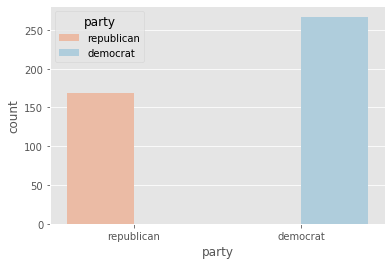

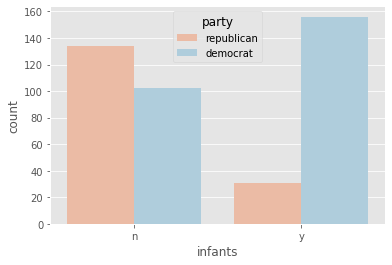

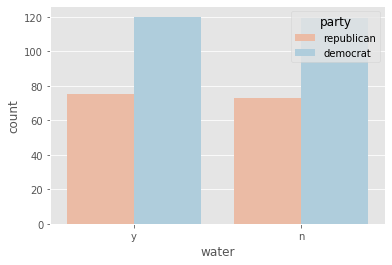

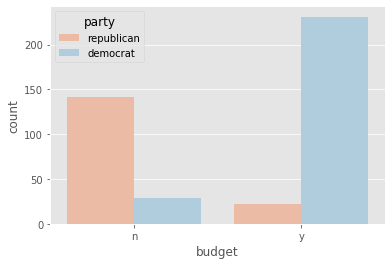

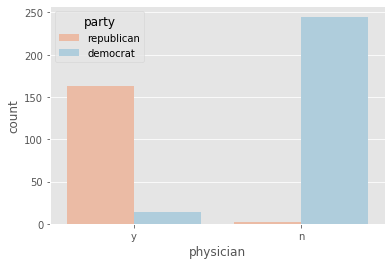

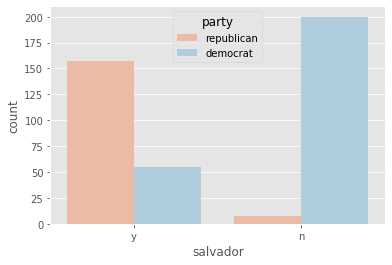

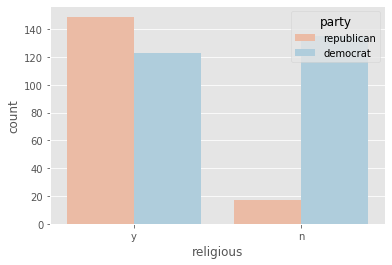

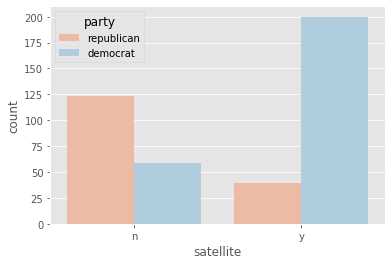

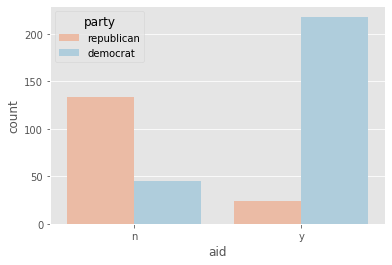

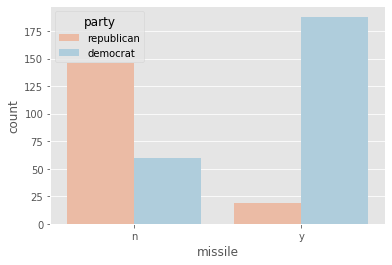

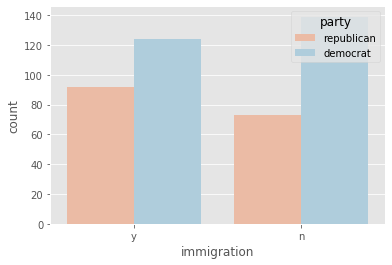

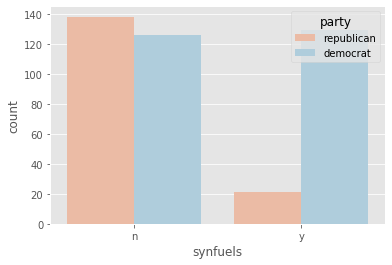

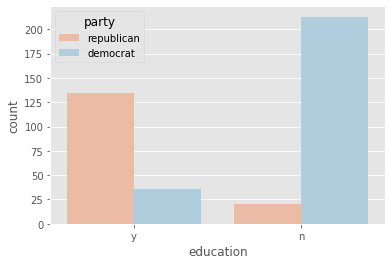

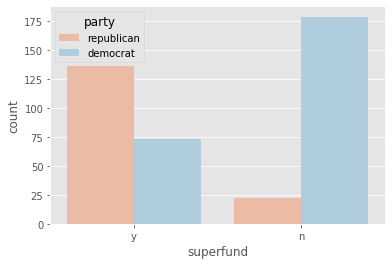

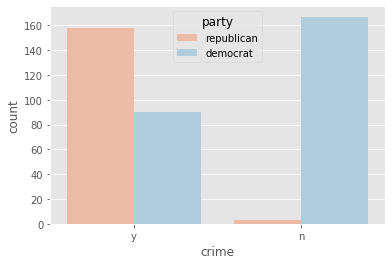

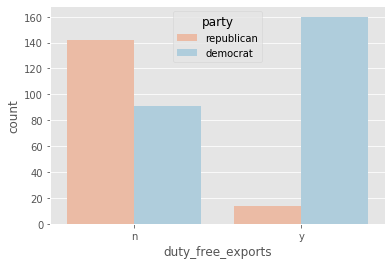

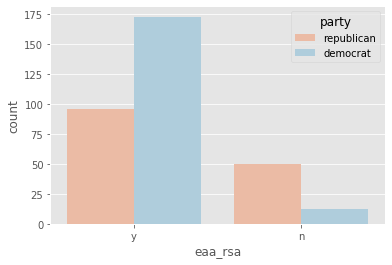

In [10]:
# create a countplot for each DataFrame column (including party)
# hue is based on political party
# consider a more color blind friendly color palette than red/blue
for i in cols:
    plt.figure()
    sns.countplot(x=df[i], hue='party', data=df, palette='RdBu')
    plt.show()

These plots give a great deal of useful information. For instance, for the physician and salvador bills, we can see that Republics resoundingly voted in favor while Democrats resoundingly opposed. On the other hand, for the missile bill, most Democrats where in favor while most Republicans opposed it. 

# K-Nearest Neighbor
Predict the label of a datapoint by looking at k-closest data points and taking a majority vote.
For example, looking at the 2-D scatterplot of petal length and petal width above, we can see how decision boundaries could be drawn so that new data points would be classified based on the labels of their nearest neighbors.
In sci-kit learn, all machine learning models are implemented as Python classes. The models implement that algorithms for learning and predicting. They also store the information learned from the data.

Note: to work with sci-kit learn, we need the following:
+ data as numpy array or pandas dataframe
+ numeric values instead of categorical values
+ no missing values in the data

First, we are going to see what happens if we don't meet these requirements above. I haven't finished preprocessing this dataset yet so there are categorical values instead of numeric values and missing values. 
<br>
Note: this doesn't work. Receive the following error: ValueError: could not convert string to float: 'n' <br>
* After converting 'y' and 'n' to 1 and 0, still receive message: could not convert string to float: '?'
* Tried turning '?' into NaN upon loading the DataFrame. NaNs are float type so I thought that this would work. However, I received error: ValueError: Input contains NaN, infinity or a value too large for dtype('float64')

## Fill Missing Values

In [11]:
# Count the number of NaNs in dataset 
df.isnull().sum()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

## Fill with Most Frequently Occurring Expected Value 

In [12]:
# for the categorical columns 
# fill missing values with the most frequent values
# Iterate over each column of the DataFrame
for col in df:
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value in the column
        df[col].fillna(df[col].value_counts()[:1].index[0], inplace=True)

df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
2,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,y,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,n,y,y,y,y


In [13]:
# Count the number of NaNs in the dataset and print the counts to verify
df.isnull().sum()

party                0
infants              0
water                0
budget               0
physician            0
salvador             0
religious            0
satellite            0
aid                  0
missile              0
immigration          0
synfuels             0
education            0
superfund            0
crime                0
duty_free_exports    0
eaa_rsa              0
dtype: int64

## Replace Categorical with Numeric Values 

In [14]:
# encode 'y' and 'n' separately so they make intuitive sense
# with 1 representing yes 
# and 0 representing no 
df.replace(['y','n'],[0,1],inplace=True)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0
1,republican,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0
2,democrat,1,0,0,1,0,0,1,1,1,1,0,1,0,0,1,1
3,democrat,1,0,0,1,0,0,1,1,1,1,0,1,0,1,1,0
4,democrat,0,0,0,1,0,0,1,1,1,1,0,1,0,0,0,0


In [15]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

In [16]:
# Randomly select one row 
# to use for a prediction later on 
rand_idx = random.randrange(len(df))

print(rand_idx)

X_new = df.iloc[rand_idx]
print(X_new)

214
party                republican
infants                       0
water                         0
budget                        1
physician                     0
salvador                      0
religious                     0
satellite                     1
aid                           1
missile                       1
immigration                   0
synfuels                      1
education                     0
superfund                     0
crime                         0
duty_free_exports             1
eaa_rsa                       0
Name: 214, dtype: object


In [17]:
print(type(X_new))

<class 'pandas.core.series.Series'>


In [18]:
# store X_new_party in a variable
X_new_party = X_new['party']
print(X_new_party)

republican


In [19]:
# drop party from X_new 
X_new = X_new.drop('party')

In [20]:
print(X_new)

infants              0
water                0
budget               1
physician            0
salvador             0
religious            0
satellite            1
aid                  1
missile              1
immigration          0
synfuels             1
education            0
superfund            0
crime                0
duty_free_exports    1
eaa_rsa              0
Name: 214, dtype: object


In [21]:
# delete X_new from the numpy array X
np.delete(X, rand_idx)

array([1, 0, 1, ..., 0, 1, 1])

In [22]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [23]:
# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [24]:
# Predict the labels for the training data X
# in the future, need to use train/test split 
# or cross validation 
y_pred = knn.predict(X)

In [25]:
# Predict and print the label for the new data point X_new
# need a 2D array instad of a 1D array
# this reshape works for a single sample 
X_new = X_new.to_numpy()
print(type(X_new))
X_new = X_new.reshape(1, -1)
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

<class 'numpy.ndarray'>
Prediction: ['republican']


In [26]:
# Does the prediction match the label?
print("Does the prediction match the label? {}".format(new_prediction[0] == X_new_party))

Does the prediction match the label? True


## Train/Test Split 

In [27]:
# Split into training and test set
# Use 20% of the dataset for a test dataset
# random_state=42 makes it possible to replicate the split 
# and reproduce downstream results 
# stratify=y means that labels will be represented in the train/test sets
# with the same distribution as the full dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [28]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [29]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [30]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9540229885057471


95% Accuracy out of the box is strong performance. 

## Hyperparameter Tuning: Find a Value for K 
Try out different values for k to choose a value that prevents overfitting or underfitting on the training dataset. <br> 
A larger k is a smoother decision boundary, a less complex model. <br>
A smaller k is a more complex model. A smaller k can also lead to overfitting. <br>

In [31]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [32]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

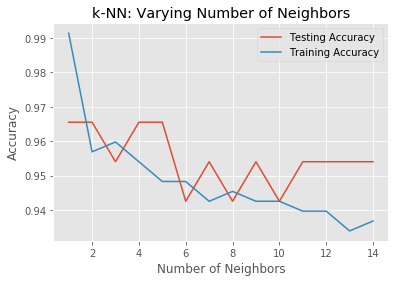

In [33]:
# Generate plot for the model complexity curve 
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

With a small k, we would potentially be overfitting to the noise in the data. The model complexity curve shows that accuracy performance on both the training and test datasets decreases as the number of neighbors increases. It looks like there is a sweet spot of 5 neighbors where we could maximize the performance of the model while avoiding overfitting or underfitting.

## Confusion Matrix 

In [34]:
# Create a k-NN classifier with 8 neighbors
knn = KNeighborsClassifier(n_neighbors=8)

In [35]:
# Split into training and test set
# Use 40% of the dataset for a test dataset
# random_state=42 makes it possible to replicate the split 
# and reproduce downstream results 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [36]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [37]:
# predict y on X_test 
y_pred = knn.predict(X_test)

In [38]:
# print the confusion matrix 
print(confusion_matrix(y_test, y_pred))

[[108   7]
 [  3  56]]


In [39]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9425287356321839


We can think of predicted values as columns and actual values as rows. In this case, being democrat happened to be the **positive class**. There are 108 ***true positives*** where it was predicted that the person was a democrat and they were actually a democrat. In 7 cases, there was a ***false negative*** where it was predicted that the person was a republican, and but they were actually a democrat. In 3 cases, there was a ***false positive*** where it was predicted that the person was a dmocrat when they were actually a republican. In 56 cases, there was a ***true negative*** where it was predicted that the person was a republican, and they actually were a republican. Overall, the classifier has 94% accuracy. 

In [40]:
# always give true label first then predicted label in sklearn
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.97      0.94      0.96       115
  republican       0.89      0.95      0.92        59

    accuracy                           0.94       174
   macro avg       0.93      0.94      0.94       174
weighted avg       0.94      0.94      0.94       174



+ **Precision** is the number of true positives / (true positive + false positive). This is the **positive predicted value** or PPV. The overall precision of 0.94 is pretty high. The classifier did a better job of predicting the party for democrats (the larger value in the dataset) than for republicans. 
+ **Recall** is the number of true positives / (true positives + false negatives). This is also called **sensitivity, hit rate, or true positive hit rate**. The average recall for the classifier is also 0.94 which is pretty high. The classifier predicted most democrats and republicans correctly, interestingly, the recall for republicans was slightly higher than democrats at 0.95 compared to 0.94. 
+ **F1-Score** is the harmonic mean of precision and recall. It is 2 * (precision * recall) / (precision + recall). In this case, the averae f1-score is also 0.94.  